In [1]:
include("../analysis/mESC/load_analysis.jl")
include("../analysis/mESC/filter_by_correlation.jl");

E:\1_WORK\Caowenjie\CellCycle-RNAseq-main\analysis\mESC
Julia Version 1.10.4
Commit 48d4fd4843 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 16 × Intel(R) Core(TM) i7-10700 CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)
Environment:
  JULIA_DEPOT_PATH = E:\Cache\julia

1333 cells in G1
2240 cells in S
2113 cells in G2M

sys:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead



Cut off 392 cells in G1
Considering 3882 genes out of 11544 in total
3054 cells in the merged (G1 + G2M) dataset
Shared genes: 1669
Removed 132 genes with r < 0.
1537 genes left remaining.


# Fig. 5A: example distributions for different models

In [9]:
function stairpts(s)
    pts = s.plots[1].converted[1][]
    [p[1] for p in pts], [p[2] for p in pts]
end

function plot_fit_theta(f::GridPosition, xdata::AbstractArray, d::Distribution, nconv::Int, th=nothing; kwargs...)
    ax = Axis(f, 
          xlabel="Counts", ylabel="Probability", kwargs...)
    xs, ww = fit_hist(xdata)
    ww = ww ./ ww.sum
    
    ylims!(0, nothing)
    xlims!(-0.8, xs[end]+0.8)
    
    s = stairs!(ax, vcat(-1, xs, xs[end]+1), vcat(0, ww, 0), 
               step=:center, color=(c1, 1), linewidth=0)

    xs′, ys′ = stairpts(s)
    band!(ax, xs′, 0*ys′, ys′, color=(colorant"#d0d0d1", 1), label="Data")
    vlines!(ax, mean(xdata), linewidth=1.5, color=(c3, 0.8))
    ys = isnothing(th) ? convn(pdf.(d, xs), nconv) : convn(pdf.(d, th, xs), nconv)
    lines!(ax, xs, ys, color=(c1, 0.8), linewidth=1.5, label="MLE fit")
    scatter!(ax, xs, ys; markersize=2, color=c1, label ="")

    ax
end

function plot_fit_theta(xdata::AbstractArray, d::Distribution, nconv::Int, th=nothing; kwargs...)
    f = Figure(size = (size_pt[1]*0.4, size_pt[2]*0.4), figure_padding = 3, fontsize=6)
    plot_fit_theta(f[1,1], xdata, d, nconv, th, kwargs...)
    f
end

plot_fit_theta (generic function with 4 methods)

In [10]:
ind = findfirst(gene_names .== "Prpf8");

#### Merged data ($\lambda$-independent)

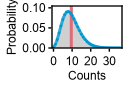

In [11]:
d = merged_th_ind_fits[ind]
y = counts_merged[ind]
nconv = 2
f = plot_fit_theta(y, d, nconv)

In [12]:
#save("../data/mESC/figures/5A_merged_th_ind.pdf", f, pt_per_unit = 1);

#### Cell-cycle data ($\lambda$-independent)

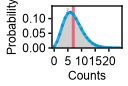

In [13]:
d = G1_th_ind_fits[ind]
y = xG1[ind]
nconv = 2
f = plot_fit_theta(y, d, nconv)

In [14]:
#save("../figures/5A_phase_th_ind_G1.pdf", f, pt_per_unit = 1);

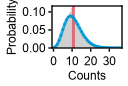

In [15]:
d = G2M_th_ind_fits[ind]
y = xG2M[ind]
nconv = 4
f = plot_fit_theta(y, d, nconv)

In [16]:
#save("../figures/5A_phase_th_ind_G2M.pdf", f, pt_per_unit = 1);

#### Merged data ($\lambda$-dependent)

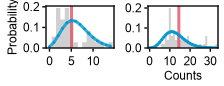

In [18]:
f = Figure(size = (size_pt[1]*0.7, size_pt[2]*0.4), figure_padding = 3, fontsize=6)
ga = f[1,1] = GridLayout()

nconv = 2
y = counts_merged[ind]
x = theta_merged
ths = sort(unique(x))
d = merged_th_dep_fits[ind]

th0 = ths[1]
y1 = y[findall(x .== th0)]
ax1 = plot_fit_theta(ga[1,1], y1, d, nconv, th0)
ax1.xlabel = ""
ax1.yticks = 0:0.1:0.2
th0 = round(th0, digits=2)

th0 = ths[end]
y2 = y[findall(x .== th0)]
ax2 = plot_fit_theta(ga[1,2], y2, d, nconv, th0)
ax2.ylabel = ""
ax2.yticks = 0:0.1:0.2
th0 = round(th0, digits=2)
colgap!(ga, 6)

f

In [19]:
#save("../data/mESC/figures/5A_merged_th_dep.pdf", f, pt_per_unit = 1);

#### Cell-cycle data ($\lambda$-dependent)

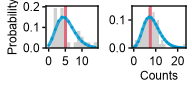

In [20]:
f = Figure(size = (size_pt[1]*0.6, size_pt[2]*0.4), figure_padding = 3, fontsize=6)
ga = f[1,1] = GridLayout()

nconv=2
y = xG1[ind]
x = thetaG1
ths = sort(unique(x))
d = G1_th_dep_fits[ind]

th0 = ths[1]
y1 = y[findall(x .== th0)]
ax1 = plot_fit_theta(ga[1,1], y1, d, nconv, th0)
ax1.xlabel = ""
ax1.yticks = 0:0.1:0.2
th0 = round(th0, digits=2)

th0 = ths[end]
y2 = y[findall(x .== th0)]
ax2 = plot_fit_theta(ga[1,2], y2, d, nconv, th0)
ax2.ylabel = ""
ax2.xticks = 0:10:20
ax2.yticks = 0:0.1:0.2
th0 = round(th0, digits=2)

colgap!(ga, 6)

f

In [21]:
#save("../data/mESC/figures/5A_phase_th_dep_G1.pdf", f, pt_per_unit = 1);

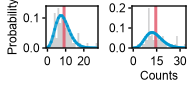

In [22]:
f = Figure(size = (size_pt[1]*0.6, size_pt[2]*0.4), figure_padding = 3, fontsize=6)
ga = f[1,1] = GridLayout()

nconv=4
y = xG2M[ind]
x = thetaG2M
ths = sort(unique(x))
d = G2M_th_dep_fits[ind]

th0 = ths[1]
y1 = y[findall(x .== th0)]
ax1 = plot_fit_theta(ga[1,1], y1, d, nconv, th0)
ax1.xlabel = ""
ax1.yticks = 0:0.1:0.1
th0 = round(th0, digits=2)

th0 = ths[end]
y2 = y[findall(x .== th0)]
ax2 = plot_fit_theta(ga[1,2], y2, d, nconv, th0)
ax2.ylabel = ""
ax2.yticks = 0:0.1:0.2
ax2.xticks = 0:15:30
th0 = round(th0, digits=2)

colgap!(ga, 6)

f

In [23]:
#save("../data/mESC/figures/5A_phase_th_dep_G2M.pdf", f, pt_per_unit = 1);

# Fig 5C: parameter ratios

In [24]:
cx1 = colorant"#8790fd"
cx2 = colorant"#0098D1"
cx3 = c2;

In [25]:
burst_freqs_G1_th_dep = get_burst_frequency.(G1_th_dep_fits)
burst_freqs_G2M_th_dep = get_burst_frequency.(G2M_th_dep_fits)
burst_freqs_merged_th_dep = get_burst_frequency.(merged_th_dep_fits)
burst_freqs_G1_th_ind = get_burst_frequency.(G1_th_ind_fits)
burst_freqs_G2M_th_ind = get_burst_frequency.(G2M_th_ind_fits)
burst_freqs_merged_th_ind = get_burst_frequency.(merged_th_ind_fits);

In [26]:
burst_sizes_G1_th_dep = get_burst_size.(G1_th_dep_fits, Ref(thetaG1))
burst_sizes_G2M_th_dep = get_burst_size.(G2M_th_dep_fits, Ref(thetaG2M))
burst_sizes_merged_th_dep = get_burst_size.(merged_th_dep_fits, Ref(theta_merged))
burst_sizes_G1_th_ind = get_burst_size.(G1_th_ind_fits)
burst_sizes_G2M_th_ind = get_burst_size.(G2M_th_ind_fits)
burst_sizes_merged_th_ind = get_burst_size.(merged_th_ind_fits);

In [27]:
ncells_G1 = length(xG1[1])
ncells_G2M = length(xG2M[1])
w1 = 2*ncells_G1 / (2*ncells_G1 + 4*ncells_G2M)
w2 = 4*ncells_G2M / (2*ncells_G1 + 4*ncells_G2M);

In [28]:
burst_freqs_phase_th_dep = @. w1 * burst_freqs_G1_th_dep + w2 * burst_freqs_G2M_th_dep
burst_freqs_phase_th_ind = @. w1 * burst_freqs_G1_th_ind + w2 * burst_freqs_G2M_th_ind
burst_sizes_phase_th_dep = @. w1 * burst_sizes_G1_th_dep + w2 * burst_sizes_G2M_th_dep
burst_sizes_phase_th_ind = @. w1 * burst_sizes_G1_th_ind + w2 * burst_sizes_G2M_th_ind;

In [29]:
ratio_f_merged_th_dep =  burst_freqs_merged_th_dep ./ burst_freqs_phase_th_dep
ratio_f_merged_th_ind = burst_freqs_merged_th_ind ./ burst_freqs_phase_th_dep
ratio_f_phase_th_ind = burst_freqs_phase_th_ind ./ burst_freqs_phase_th_dep

ratio_b_merged_th_dep = burst_sizes_merged_th_dep ./ burst_sizes_phase_th_dep
ratio_b_merged_th_ind = burst_sizes_merged_th_ind ./ burst_sizes_phase_th_dep
ratio_b_phase_th_ind = burst_sizes_phase_th_ind ./ burst_sizes_phase_th_dep;

In [30]:
cx1 = colorant"#8790fd"
cx2 = colorant"#0098D1"
cx3 = colorant"#f07269";

In [31]:
f = Figure(size = (size_pt[1]*1.0, size_pt[2]*1.6), figure_padding = 1)
ga = f[1,1] = GridLayout()

y1 = ratio_f_phase_th_ind; x1 = fill("c_th_ind", length(y1))
y2 = ratio_f_merged_th_dep; x2 = fill("m_th_dep", length(y2))
y3 = ratio_f_merged_th_ind; x3 = fill("m_th_ind", length(y3))
ax1 = Axis(ga[1, 1], xlabel="", ylabel="", xticks=0.6:0.2:1.8)
rainclouds!(ax1, vcat(x3, x2, x1), vcat(y3, y2, y1), gap=-0.5,
            orientation = :horizontal,
            color = vcat(fill(cx1, length(y1)), fill(cx2, length(y2)), fill(cx3, length(y3))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.2, markersize=1.3, side_nudge=0.127)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0.57, 1.83)

y1 = ratio_b_phase_th_ind; x1 = fill("c_th_ind", length(y1))
y2 = ratio_b_merged_th_dep; x2 = fill("m_th_dep", length(y2))
y3 = ratio_b_merged_th_ind; x3 = fill("m_th_ind", length(y3))
ax2 = Axis(ga[2, 1], xlabel="", ylabel="", xticks=0.8:0.2:1.8)
rainclouds!(ax2, vcat(x3, x2, x1), vcat(y3, y2, y1), gap=-0.5,
            orientation = :horizontal,
            color = vcat(fill(cx1, length(y1)), fill(cx2, length(y2)), fill(cx3, length(y3))),
            cloud_width=0.9, show_median=false, violin_limits=(-Inf, Inf), clouds=violin,
            boxplot_width=0.1, boxplot_nudge=0.0, strokewidth = 0.7, whiskerwidth=0,
            jitter_width=0.2, markersize=1.3, side_nudge=0.127)
vlines!(1, color=(:black, 0.5), linestyle=:dash)
xlims!(0.77, 1.83)

rowgap!(ga, 6)

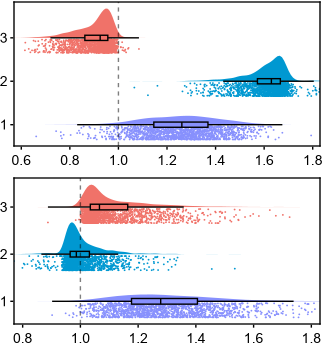

In [32]:
f

In [33]:
abs(1-median(ratio_b_merged_th_ind))*100

27.814568642525693

In [34]:
abs(1-median(ratio_b_merged_th_dep))*100

1.4033096857866467

In [35]:
abs(1-median(ratio_f_merged_th_ind))*100

26.116602870796623

In [36]:
abs(1-median(ratio_f_merged_th_dep))*100

62.979511978649036

In [37]:
abs(1-median(ratio_f_phase_th_ind))*100

7.516747085447085

In [38]:
abs(1-median(ratio_b_phase_th_ind))*100

6.601388827584342

In [39]:
#save("../data/mESC/figures/5C_bf_ratio_dists.pdf", f, pt_per_unit = 1);

# Fig. 5b: Example gene ratios

In [40]:
get_merged_th_ind(ind) = [[merged_th_ind_fits[ind]], [counts_merged[ind]], [nothing], [2], [1]]
get_merged_th_dep(ind) = [[merged_th_dep_fits[ind]], [counts_merged[ind]], [theta_merged], [2], [1]]
get_phase_th_ind(ind) = [[G1_th_ind_fits[ind], G2M_th_ind_fits[ind]], [xG1[ind], xG2M[ind]], [nothing, nothing], [2, 4], [w1, w2]]
get_phase_th_dep(ind) = [[G1_th_dep_fits[ind], G2M_th_dep_fits[ind]], [xG1[ind], xG2M[ind]], [thetaG1, thetaG2M], [2, 4], [w1, w2]];

In [41]:
genes = ["Avpi1", "Macf1", "Rpl12", "Nme1", "Ddx23"]
inds = [findfirst(gene_names .== gene) for gene in genes];

In [42]:
CI_ratio_f_merged_th_ind = @time get_ratio_confidence_intervals_weighted_avg(inds, get_merged_th_ind, get_phase_th_dep, get_burst_frequency_ratio_CI_PL_weighted_avg, time_limit=100.0)
CI_ratio_f_merged_th_dep = @time get_ratio_confidence_intervals_weighted_avg(inds, get_merged_th_dep, get_phase_th_dep, get_burst_frequency_ratio_CI_PL_weighted_avg, time_limit=100.0)
CI_ratio_f_phase_th_ind = @time get_ratio_confidence_intervals_weighted_avg(inds, get_phase_th_ind, get_phase_th_dep, get_burst_frequency_ratio_CI_PL_weighted_avg, time_limit=100.0)

CI_ratio_b_merged_th_ind = @time get_ratio_confidence_intervals_weighted_avg(inds, get_merged_th_ind, get_phase_th_dep, get_burst_size_ratio_CI_PL_weighted_avg, time_limit=100.0)
CI_ratio_b_merged_th_dep = @time get_ratio_confidence_intervals_weighted_avg(inds, get_merged_th_dep, get_phase_th_dep, get_burst_size_ratio_CI_PL_weighted_avg, time_limit=100.0)
CI_ratio_b_phase_th_ind = @time get_ratio_confidence_intervals_weighted_avg(inds, get_phase_th_ind, get_phase_th_dep, get_burst_size_ratio_CI_PL_weighted_avg, time_limit=100.0);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

 33.894880 seconds (42.08 M allocations: 5.009 GiB, 4.61% gc time, 86.83% compilation time: <1% of which was recompilation)
 48.194179 seconds (19.98 M allocations: 15.544 GiB, 17.39% gc time, 55.21% compilation time)
 33.411431 seconds (14.77 M allocations: 4.645 GiB, 4.23% gc time, 82.34% compilation time)
 25.275422 seconds (14.39 M allocations: 3.572 GiB, 5.36% gc time, 79.69% compilation time)
 45.833840 seconds (17.28 M allocations: 16.293 GiB, 14.89% gc time, 54.69% compilation time)
 36.064276 seconds (13.22 M allocations: 6.482 GiB, 5.18% gc time, 76.24% compilation time)


In [43]:
f = Figure(size = (size_pt[1]*0.9, size_pt[2]*1.6), figure_padding = 1)
ga = f[1,1] = GridLayout()

ax = Axis(ga[1,1],
          xlabel="", ylabel="Burst frequency ratio", xticklabelsvisible=false)
x = 1:length(genes)
ax.xticks = (x, genes)

y1 = ratio_f_merged_th_ind[inds]
y1_lb = first.(CI_ratio_f_merged_th_ind)
y1_ub = last.(CI_ratio_f_merged_th_ind)
y2 = ratio_f_merged_th_dep[inds]
y2_lb = first.(CI_ratio_f_merged_th_dep)
y2_ub = last.(CI_ratio_f_merged_th_dep)
y3 = ratio_f_phase_th_ind[inds]
y3_lb = first.(CI_ratio_f_phase_th_ind)
y3_ub = last.(CI_ratio_f_phase_th_ind)

hlines!(ax, 1, color=(:black, 0.5), linestyle=:dash)
scatter!(ax, x, y1, markersize=7, color=(cx1, 0.9))
scatter!(ax, x, y2, markersize=7, color=(cx2, 0.9))
scatter!(ax, x, y3, markersize=7, color=(cx3, 0.9))
errorbars!(ax, x, y1, y1 .- y1_lb, y1_ub .- y1, whiskerwidth=5, color=(cx1, 0.9))
errorbars!(ax, x, y2, y2 .- y2_lb, y2_ub .- y2, whiskerwidth=5, color=(cx2, 0.9))
errorbars!(ax, x, y3, y3 .- y3_lb, y3_ub .- y3, whiskerwidth=5, color=(cx3, 0.9))

ax = Axis(ga[2,1],
          xlabel="", ylabel="Burst size ratio")
x = 1:length(genes)
ax.xticks = (x, genes)

y1 = ratio_b_merged_th_ind[inds]
y1_lb = first.(CI_ratio_b_merged_th_ind)
y1_ub = last.(CI_ratio_b_merged_th_ind)
y2 = ratio_b_merged_th_dep[inds]
y2_lb = first.(CI_ratio_b_merged_th_dep)
y2_ub = last.(CI_ratio_b_merged_th_dep)
y3 = ratio_b_phase_th_ind[inds]
y3_lb = first.(CI_ratio_b_phase_th_ind)
y3_ub = last.(CI_ratio_b_phase_th_ind)

hlines!(ax, 1, color=(:black, 0.5), linestyle=:dash)
scatter!(ax, x, y1, markersize=7, color=(cx1, 0.9))
scatter!(ax, x, y2, markersize=7, color=(cx2, 0.9))
scatter!(ax, x, y3, markersize=7, color=(cx3, 0.9))
errorbars!(ax, x, y1, y1 .- y1_lb, y1_ub .- y1, whiskerwidth=5, color=(cx1, 0.9))
errorbars!(ax, x, y2, y2 .- y2_lb, y2_ub .- y2, whiskerwidth=5, color=(cx2, 0.9))
errorbars!(ax, x, y3, y3 .- y3_lb, y3_ub .- y3, whiskerwidth=5, color=(cx3, 0.9))
ylims!(0.65, 2.4)

rowgap!(ga, 3)

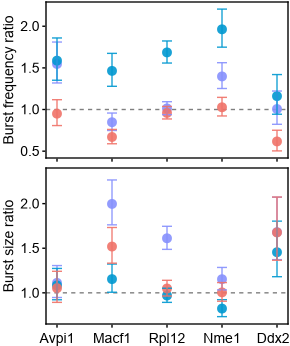

In [44]:
f

In [45]:
#save("../data/mESC/figures/5B_ratios.pdf", f, pt_per_unit = 1);